In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.DataFrame({
    "Department": ["Sales", "Marketing", "IT", "HR", "Finance", "Operations", "Logistics", "R&D", "Legal", "Admin", "Admin"],
    "Revenue": [500000, 350000, np.nan, 150000, 400000, 450000, 300000, -10000, "", 25000, 25000],
    "Expenses": [200000, np.nan, 100000, 80000, 150000, "", 180000, 90000, 120000, 220000, 220000],
    "Profit": [300000, 170000, 100000, 70000, 250000, 200000, np.nan, 20000, 0, -10000000, -10000000],
})

data

,Department,Revenue,Expenses,Profit
0,Sales,500000,200000,300000.0
1,Marketing,350000,NaN,170000.0
2,IT,NaN,100000,100000.0
3,HR,150000,80000,70000.0
4,Finance,400000,150000,250000.0
5,Operations,450000,,200000.0
6,Logistics,300000,180000,NaN
7,R&D,-10000,90000,20000.0
8,Legal,,120000,0.0
9,Admin,25000,220000,-10000000.0


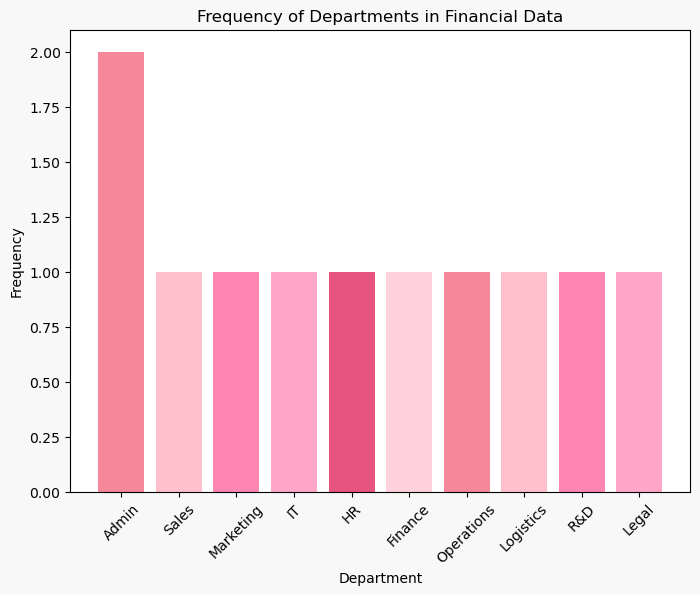

In [281]:
department_counts = data["Department"].value_counts()
plt.figure(figsize=(8, 6), facecolor='#F8F8F8')
colors = ['#F7879A', 'pink', '#FF85B2', '#FFA6C9', '#E75480', '#FFD1DC']
plt.bar(department_counts.index, department_counts.values, color=colors[:len(department_counts)])
plt.xlabel("Department")
plt.ylabel("Frequency")
plt.title("Frequency of Departments in Financial Data")
plt.xticks(rotation=45)
plt.show()

In [283]:
data = data.drop_duplicates()
data

,Department,Revenue,Expenses,Profit
0,Sales,500000,200000,300000.0
1,Marketing,350000,NaN,170000.0
2,IT,NaN,100000,100000.0
3,HR,150000,80000,70000.0
4,Finance,400000,150000,250000.0
5,Operations,450000,,200000.0
6,Logistics,300000,180000,NaN
7,R&D,-10000,90000,20000.0
8,Legal,,120000,0.0
9,Admin,25000,220000,-10000000.0


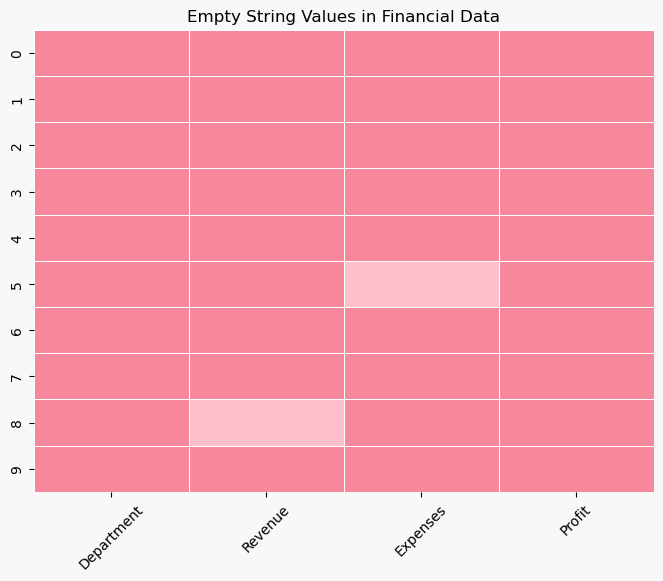

In [285]:
plt.figure(figsize=(8, 6), facecolor='#F8F8F8')
cmap = sns.color_palette(["#F7879A", "#FFC0CB"], as_cmap=True)
sns.heatmap(data == "", cmap=cmap, cbar=False, linewidths=0.5)
plt.title("Empty String Values in Financial Data")
plt.xticks(rotation=45)
plt.show()

In [287]:
#Data Cleaning
data.replace("", np.nan, inplace=True)
data

C:\Users\huawei\AppData\Local\Temp\ipykernel_20128\386766873.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace("", np.nan, inplace=True)
C:\Users\huawei\AppData\Local\Temp\ipykernel_20128\386766873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace("", np.nan, inplace=True)


,Department,Revenue,Expenses,Profit
0,Sales,500000.0,200000.0,300000.0
1,Marketing,350000.0,NaN,170000.0
2,IT,NaN,100000.0,100000.0
3,HR,150000.0,80000.0,70000.0
4,Finance,400000.0,150000.0,250000.0
5,Operations,450000.0,NaN,200000.0
6,Logistics,300000.0,180000.0,NaN
7,R&D,-10000.0,90000.0,20000.0
8,Legal,NaN,120000.0,0.0
9,Admin,25000.0,220000.0,-10000000.0


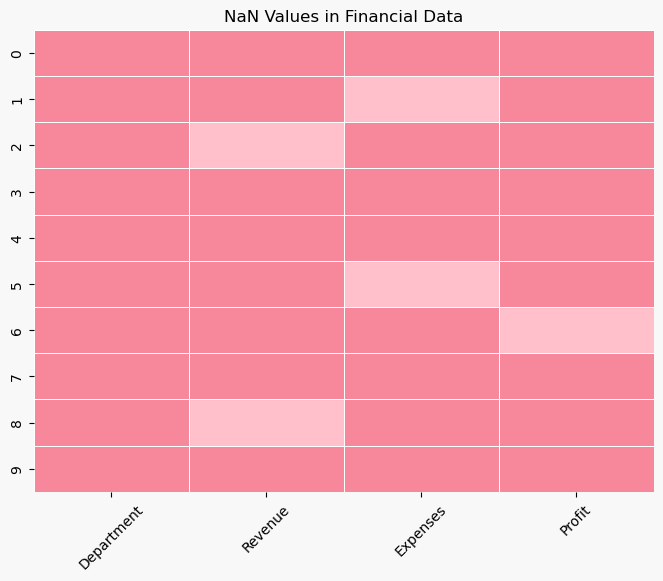

In [289]:
plt.figure(figsize=(8, 6), facecolor='#F8F8F8')
cmap = sns.color_palette(["#F7879A", "#FFC0CB"], as_cmap=True)
sns.heatmap(data.isna(), cmap=cmap, cbar=False, linewidths=0.5)
plt.title("NaN Values in Financial Data")
plt.xticks(rotation=45)
plt.show()

In [291]:
data

,Department,Revenue,Expenses,Profit
0,Sales,500000.0,200000.0,300000.0
1,Marketing,350000.0,NaN,170000.0
2,IT,NaN,100000.0,100000.0
3,HR,150000.0,80000.0,70000.0
4,Finance,400000.0,150000.0,250000.0
5,Operations,450000.0,NaN,200000.0
6,Logistics,300000.0,180000.0,NaN
7,R&D,-10000.0,90000.0,20000.0
8,Legal,NaN,120000.0,0.0
9,Admin,25000.0,220000.0,-10000000.0


In [293]:
data.loc[(data["Revenue"].isna()) | (data["Revenue"] < 0), "Revenue"] = data["Profit"] + data["Expenses"]
data

,Department,Revenue,Expenses,Profit
0,Sales,500000.0,200000.0,300000.0
1,Marketing,350000.0,NaN,170000.0
2,IT,200000.0,100000.0,100000.0
3,HR,150000.0,80000.0,70000.0
4,Finance,400000.0,150000.0,250000.0
5,Operations,450000.0,NaN,200000.0
6,Logistics,300000.0,180000.0,NaN
7,R&D,110000.0,90000.0,20000.0
8,Legal,120000.0,120000.0,0.0
9,Admin,25000.0,220000.0,-10000000.0


In [295]:
data.loc[(data["Expenses"].isna()) | (data["Expenses"] < 0), "Expenses"] = data["Revenue"] - data["Profit"]
data

,Department,Revenue,Expenses,Profit
0,Sales,500000.0,200000.0,300000.0
1,Marketing,350000.0,180000.0,170000.0
2,IT,200000.0,100000.0,100000.0
3,HR,150000.0,80000.0,70000.0
4,Finance,400000.0,150000.0,250000.0
5,Operations,450000.0,250000.0,200000.0
6,Logistics,300000.0,180000.0,NaN
7,R&D,110000.0,90000.0,20000.0
8,Legal,120000.0,120000.0,0.0
9,Admin,25000.0,220000.0,-10000000.0


In [297]:
data.loc[data["Profit"].isna(), "Profit"] = data["Revenue"] - data["Expenses"]
data

,Department,Revenue,Expenses,Profit
0,Sales,500000.0,200000.0,300000.0
1,Marketing,350000.0,180000.0,170000.0
2,IT,200000.0,100000.0,100000.0
3,HR,150000.0,80000.0,70000.0
4,Finance,400000.0,150000.0,250000.0
5,Operations,450000.0,250000.0,200000.0
6,Logistics,300000.0,180000.0,120000.0
7,R&D,110000.0,90000.0,20000.0
8,Legal,120000.0,120000.0,0.0
9,Admin,25000.0,220000.0,-10000000.0


C:\Users\huawei\AppData\Local\Temp\ipykernel_20128\4005896368.py:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(data=data.select_dtypes(include=[np.number]), palette=c)


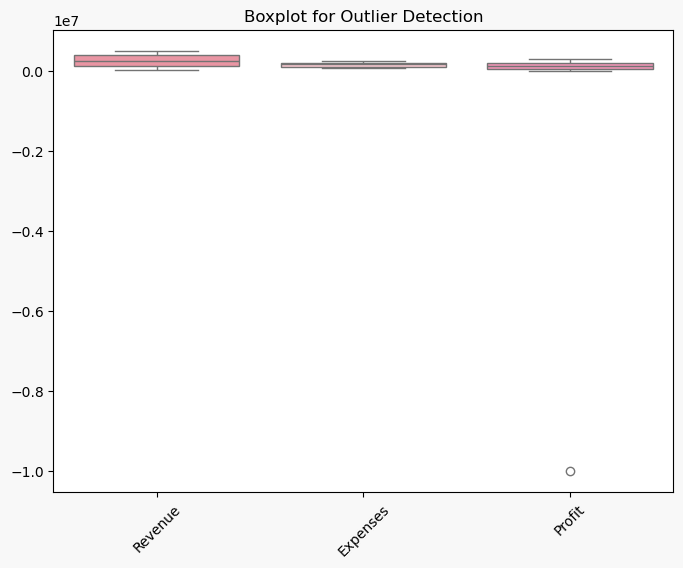

In [299]:
plt.figure(figsize=(8, 6), facecolor='#F8F8F8')
colors = ['#F7879A', 'pink', '#FF85B2', '#FFA6C9', '#E75480', '#FFD1DC']
c = sns.color_palette(colors)
sns.boxplot(data=data.select_dtypes(include=[np.number]), palette=c)
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

In [301]:
data

,Department,Revenue,Expenses,Profit
0,Sales,500000.0,200000.0,300000.0
1,Marketing,350000.0,180000.0,170000.0
2,IT,200000.0,100000.0,100000.0
3,HR,150000.0,80000.0,70000.0
4,Finance,400000.0,150000.0,250000.0
5,Operations,450000.0,250000.0,200000.0
6,Logistics,300000.0,180000.0,120000.0
7,R&D,110000.0,90000.0,20000.0
8,Legal,120000.0,120000.0,0.0
9,Admin,25000.0,220000.0,-10000000.0


In [303]:
data = data[data["Profit"] >= 0].copy()
data

,Department,Revenue,Expenses,Profit
0,Sales,500000.0,200000.0,300000.0
1,Marketing,350000.0,180000.0,170000.0
2,IT,200000.0,100000.0,100000.0
3,HR,150000.0,80000.0,70000.0
4,Finance,400000.0,150000.0,250000.0
5,Operations,450000.0,250000.0,200000.0
6,Logistics,300000.0,180000.0,120000.0
7,R&D,110000.0,90000.0,20000.0
8,Legal,120000.0,120000.0,0.0


C:\Users\huawei\AppData\Local\Temp\ipykernel_20128\4005896368.py:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(data=data.select_dtypes(include=[np.number]), palette=c)


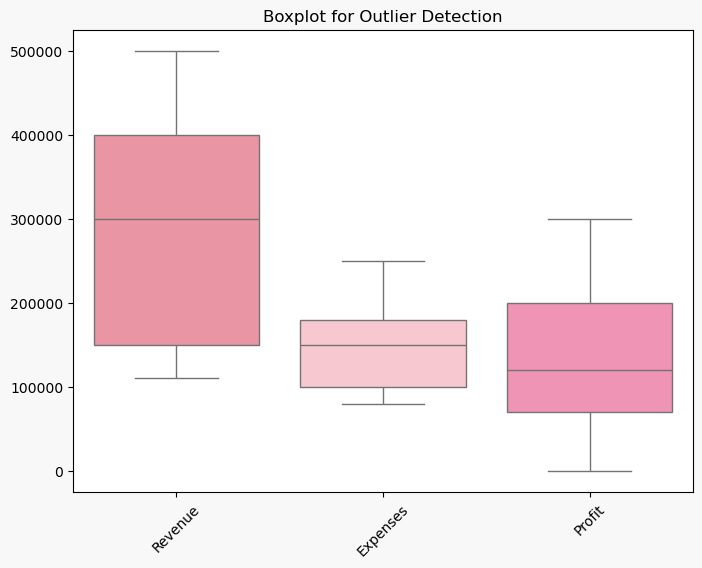

In [305]:
plt.figure(figsize=(8, 6), facecolor='#F8F8F8')
colors = ['#F7879A', 'pink', '#FF85B2', '#FFA6C9', '#E75480', '#FFD1DC']
c = sns.color_palette(colors)
sns.boxplot(data=data.select_dtypes(include=[np.number]), palette=c)
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

In [315]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# تحويل الأقسام إلى OneHotEncoding
encoder = OneHotEncoder(drop='first', sparse_output=False)
department_encoded = encoder.fit_transform(data[['Department']])
depart = pd.DataFrame(department_encoded, columns=encoder.get_feature_names_out(['Department']))

# تجهيز البيانات
X = pd.concat([data[["Revenue", "Expenses"]], depart], axis=1)  
y = data["Profit"]  

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# تدريب النموذج
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# تقييم النموذج باستخدام المقاييس الصحيحة
mae = mean_absolute_error(y_test, y_pred) #يقيس متوسط الاخطاء
mse = mean_squared_error(y_test, y_pred) #يقيس متوسط الخطا التربيعي 
r2 = r2_score(y_test, y_pred) #يقيس دقة النموذج
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# إجراء التنبؤ
sample_input = [[500000, 200000] + list(depart.iloc[0])]
prediction = model.predict(sample_input)
print(f"Predicted Profit: {prediction[0]:.2f}")


Mean Absolute Error: 0.00
Mean Squared Error: 0.00
R² Score: 1.00
Predicted Profit: 300000.00


C:\Users\huawei\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
